In [27]:
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
import pickle
%matplotlib inline

In [2]:
# Loading data
customer_complaints_df = pd.read_csv("../Resources/ModelData/train_test_data.csv")
customer_complaints_df.head()

,Consumer complaint narrative,Product
0,privacy following year list item informationis...,Credit reporting or other personal consumer re...
1,didnt report xxxx opened account knwledge til ...,Credit reporting or other personal consumer re...
2,issue call year stop paid transfer phone tryin...,Debt collection
3,privacy following year list item record relati...,Credit reporting or other personal consumer re...
4,harm requesting desist charge individual feder...,Debt collection


In [3]:
# Define features set
X = customer_complaints_df['Consumer complaint narrative']
X.head()

0    privacy following year list item informationis...
1    didnt report xxxx opened account knwledge til ...
2    issue call year stop paid transfer phone tryin...
3    privacy following year list item record relati...
4    harm requesting desist charge individual feder...
Name: Consumer complaint narrative, dtype: object

In [4]:
# Define target vector
y = customer_complaints_df['Product']
y.head()

0    Credit reporting or other personal consumer re...
1    Credit reporting or other personal consumer re...
2                                      Debt collection
3    Credit reporting or other personal consumer re...
4                                      Debt collection
Name: Product, dtype: object

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of each set
print("Training features:", X_train.shape)
print("Testing features:", X_test.shape)
print("Training labels:", y_train.shape)
print("Testing labels:", y_test.shape)

Training features: (81420,)
Testing features: (20356,)
Training labels: (81420,)
Testing labels: (20356,)


In [6]:
# Creating StandardScaler instance
scaler = StandardScaler() 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    customer_complaints_df['Consumer complaint narrative'],
    customer_complaints_df['Product'],
    test_size=0.2,
    random_state=42
)

In [8]:
# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Use the top 5000 words
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [9]:
# Preprocess categorical features using one-hot encoding
label_encoder = LabelEncoder()
labels = customer_complaints_df['Product']
y = label_encoder.fit_transform(labels)

In [10]:
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [11]:
# Fitting Standard Scaller
X_train_dense = X_train_tfidf.toarray()
X_scaler = scaler.fit(X_train_dense)

In [12]:
# Scaling data
max_abs_scaler = MaxAbsScaler()
X_train_scaled = max_abs_scaler.fit_transform(X_train_tfidf)
X_test_scaled = max_abs_scaler.transform(X_test_tfidf)

In [13]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [14]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [15]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [19]:
# Assuming y_test and predictions are available
cm = confusion_matrix(y_test, predictions)

# Check unique classes in y_test and predictions
classes = np.unique(np.concatenate((y_test, predictions)))
class_labels = [f"Class {label}" for label in classes]

# Create DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=[f"Actual {label}" for label in classes],
                     columns=[f"Predicted {label}" for label in classes])

# Display confusion matrix DataFrame
print(cm_df)

# Calculate accuracy score
acc_score = accuracy_score(y_test, predictions)
print("Accuracy Score:", acc_score)

           Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4  \
Actual 0           631           30           78            1            0   
Actual 1            56          534          212           13            0   
Actual 2            11           17        15966           73            0   
Actual 3            14           19          545         1088            0   
Actual 4             2            4           15            4            0   
Actual 5           158           14           29            1            0   
Actual 6            16           10           72            3            0   
Actual 7            15           17           53            9            0   
Actual 8            24           12           11            1            0   
Actual 9             6            2           46            6            0   
Actual 10           15           17           95           19            0   

           Predicted 5  Predicted 6  Predicted 7  Predicted 8  

In [20]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9,Predicted 10
Actual 0,631,30,78,1,0,3,2,0,0,0,1
Actual 1,56,534,212,13,0,0,1,0,0,0,0
Actual 2,11,17,15966,73,0,0,3,0,0,0,0
Actual 3,14,19,545,1088,0,0,2,0,0,0,1
Actual 4,2,4,15,4,0,0,1,0,0,0,0
Actual 5,158,14,29,1,0,11,2,0,0,1,0
Actual 6,16,10,72,3,0,0,221,0,0,0,0
Actual 7,15,17,53,9,0,0,6,3,0,8,1
Actual 8,24,12,11,1,0,0,0,0,4,0,0
Actual 9,6,2,46,6,0,0,3,0,0,92,0


Accuracy Score : 0.9122617410100217
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.85      0.74       746
           1       0.79      0.65      0.72       816
           2       0.93      0.99      0.96     16070
           3       0.89      0.65      0.75      1669
           4       0.00      0.00      0.00        26
           5       0.79      0.05      0.10       216
           6       0.89      0.69      0.78       322
           7       1.00      0.03      0.05       112
           8       1.00      0.08      0.14        52
           9       0.91      0.59      0.72       155
          10       0.87      0.12      0.21       172

    accuracy                           0.91     20356
   macro avg       0.79      0.43      0.47     20356
weighted avg       0.91      0.91      0.90     20356



/opt/anaconda3/envs/pythondata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pythondata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pythondata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [23]:
if isinstance(X, pd.Series):
    X = X.to_frame()  # Converts the Series to a DataFrame

In [24]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.006902698352980861, 'Consumer complaint narrative')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

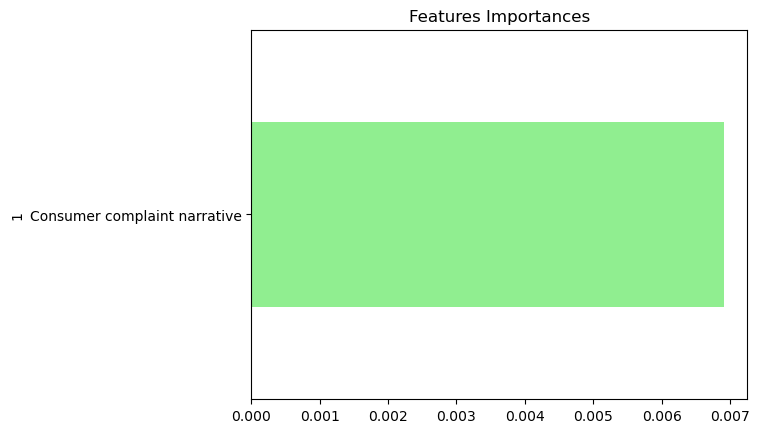

In [25]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [29]:
# Save the model
with open('../Resources/ModelData/random_forest_model_A.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)
# Save the vectorizer
with open('../Resources/ModelData/tfidf_vectorizer_A.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)
print("Random Forest Model and vectorizer saved with pickle.")

Random Forest Model and vectorizer saved with pickle.


In [36]:
# Load the model
with open('../Resources/ModelData/random_forest_model_A.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
# Load the vectorizer
with open('../Resources/ModelData/tfidf_vectorizer_A.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)

In [37]:
# Predict with the loaded model
sample_text = ['The bank added 10 late fees for insufficient funds.']
sample_tfidf = loaded_vectorizer.transform(sample_text)
predicted_class = loaded_model.predict(sample_tfidf)
print("Predicted class:", predicted_class)

Predicted class: [2]
